In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import seaborn as sns


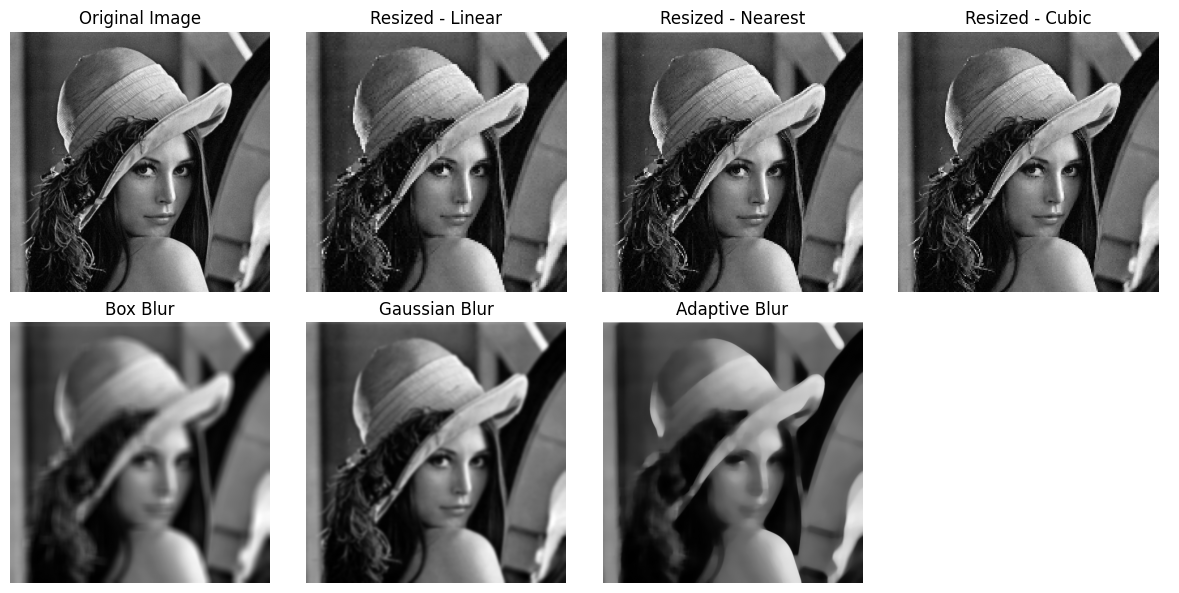

In [ ]:
# ========== Task 1: Image Processing ==========
# Load the image in grayscale
image_path = "IMG.png"  # Change this to your image path
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Resize using different interpolation methods
resized_linear = cv2.resize(image, (150, 150), interpolation=cv2.INTER_LINEAR)
resized_nearest = cv2.resize(image, (200, 200), interpolation=cv2.INTER_NEAREST)
resized_cubic = cv2.resize(image, (200, 200), interpolation=cv2.INTER_CUBIC)

# Apply different blurring techniques
box_blur = cv2.blur(image, (25, 25))
gaussian_blur = cv2.GaussianBlur(image, (21, 21), 0)
adaptive_blur = cv2.medianBlur(image, 27)

# Display results
fig, axes = plt.subplots(2, 4, figsize=(12, 6))
axes = axes.ravel()

axes[0].imshow(image, cmap='gray'); axes[0].set_title("Original Image")
axes[1].imshow(resized_linear, cmap='gray'); axes[1].set_title("Resized - Linear")
axes[2].imshow(resized_nearest, cmap='gray'); axes[2].set_title("Resized - Nearest")
axes[3].imshow(resized_cubic, cmap='gray'); axes[3].set_title("Resized - Cubic")
axes[4].imshow(box_blur, cmap='gray'); axes[4].set_title("Box Blur")
axes[5].imshow(gaussian_blur, cmap='gray'); axes[5].set_title("Gaussian Blur")
axes[6].imshow(adaptive_blur, cmap='gray'); axes[6].set_title("Adaptive Blur")

for ax in axes:
    ax.axis('off')
plt.tight_layout()
plt.show()

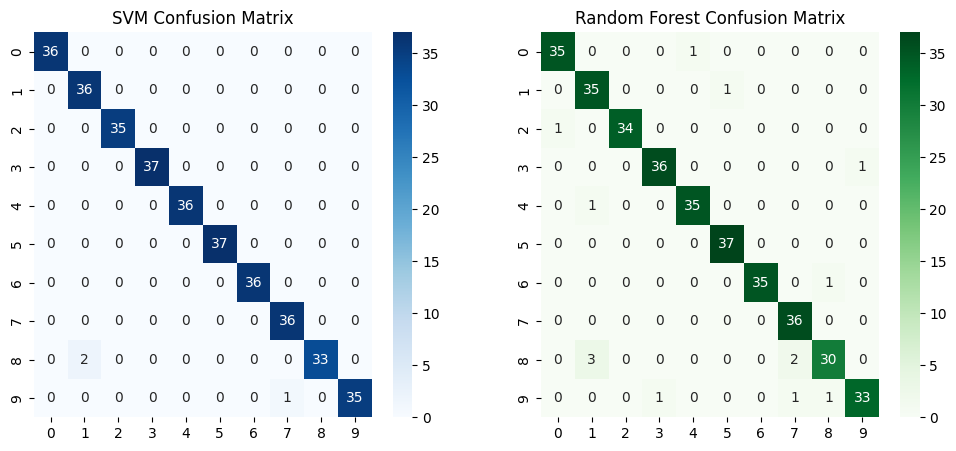

SVM Results: {'Accuracy': 0.9916666666666667, 'Precision': 0.9920341394025605, 'Recall': 0.9916666666666667, 'F1-Score': 0.9916595064551902, 'Confusion Matrix': array([[36,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 36,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 35,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 37,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 36,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 37,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 36,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 36,  0,  0],
       [ 0,  2,  0,  0,  0,  0,  0,  0, 33,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  0, 35]])}
Random Forest Results: {'Accuracy': 0.9611111111111111, 'Precision': 0.9619957049958986, 'Recall': 0.9611111111111111, 'F1-Score': 0.9609403298924463, 'Confusion Matrix': array([[35,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 35,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 1,  0, 34,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 36,  0,  

In [ ]:
# ========== Task 2: Machine Learning on MNIST ==========
# Load dataset
digits = load_digits()
X, y = digits.data, digits.target

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define models
svm_model = SVC(probability=True, kernel='rbf', random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train models
svm_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# Predictions
svm_pred = svm_model.predict(X_test)
rf_pred = rf_model.predict(X_test)

# Compute metrics
def evaluate_model(y_true, y_pred):
    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred, average='weighted'),
        "Recall": recall_score(y_true, y_pred, average='weighted'),
        "F1-Score": f1_score(y_true, y_pred, average='weighted'),
        "Confusion Matrix": confusion_matrix(y_true, y_pred)
    }

svm_results = evaluate_model(y_test, svm_pred)
rf_results = evaluate_model(y_test, rf_pred)

# Display confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(svm_results["Confusion Matrix"], annot=True, fmt='d', cmap="Blues", ax=axes[0])
axes[0].set_title("SVM Confusion Matrix")
sns.heatmap(rf_results["Confusion Matrix"], annot=True, fmt='d', cmap="Greens", ax=axes[1])
axes[1].set_title("Random Forest Confusion Matrix")
plt.show()

# Print results
print("SVM Results:", svm_results)
print("Random Forest Results:", rf_results)


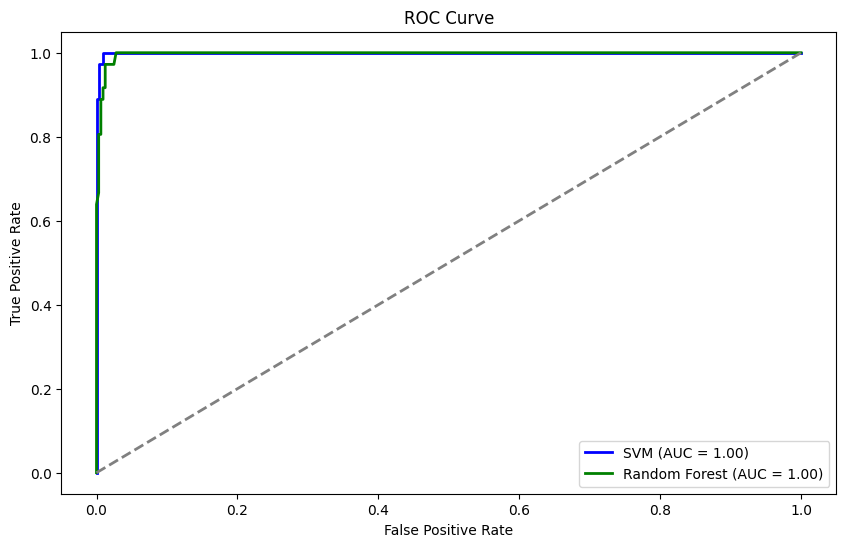

In [ ]:
# Compute ROC curve and AUC for SVM
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, svm_model.predict_proba(X_test)[:, 1], pos_label=1)
auc_svm = auc(fpr_svm, tpr_svm)

# Compute ROC curve and AUC for Random Forest
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1], pos_label=1)
auc_rf = auc(fpr_rf, tpr_rf)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr_svm, tpr_svm, color='blue', lw=2, label=f'SVM (AUC = {auc_svm:.2f})')
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label=f'Random Forest (AUC = {auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')  # Random classifier line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()
